In [1]:
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the experimental data
from exp_data import exp_data

### Running enrichment analysis via EnrichR

MAGINE allows users to upload lists of genes for analysis and retrieves the results in an `EnrichmentResult` Class.

In [ ]:
from magine.enrichment.enrichr import Enrichr
e = Enrichr()

In [8]:
help(e)

Help on Enrichr in module magine.enrichment.enrichr object:

class Enrichr(builtins.object)
 |  Enrichr(verbose=False)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, verbose=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  print_valid_libs(self)
 |      Print a list of all available libraries EnrichR has to offer.
 |  
 |  run(self, list_of_genes, gene_set_lib='GO_Biological_Process_2017')
 |      Parameters
 |      ----------
 |      list_of_genes : list_like
 |          List of genes using HGNC gene names
 |      gene_set_lib : str or list
 |          Name of gene set library
 |          To print options use Enrichr.print_valid_libs
 |      
 |      
 |      Examples
 |      --------
 |      >>> import pandas as pd
 |      >>> pd.set_option('display.max_colwidth', 40)
 |      >>> pd.set_option('precision', 3)
 |      >>> e = Enrichr()
 |      >>> df = e.run(['BAX', 'BCL2', 'CASP3', 'CASP8'],                         gene_set_lib='Reactome_

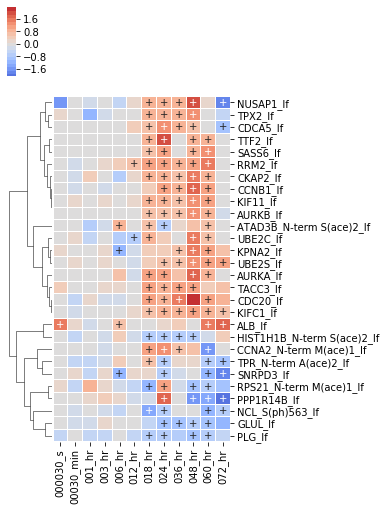

In [5]:
# from supplement_notebook_1
exp_data.label_free.heatmap(
    index='label',
    linewidths=0.01, 
    cluster_row=True, 
    min_sig=4,
    figsize=(4, 8)
);

In [10]:
df = e.run_samples(
    [exp_data.label_free.up.require_n_sig(n_sig=4).id_list, 
     exp_data.label_free.down.require_n_sig(n_sig=4).id_list,],
    ['label_free_up', 'label_free_down'],
    gene_set_lib='Reactome_2016')
df.term_name = df.term_name.str.split('_').str.get(0)

In [ ]:
df.heatmap(
    min_sig=1, 
    linewidths=0.01, 
    convert_to_log=False,
    figsize=(3, 12)
);
print(up_only.shape)

In [24]:
df.head(10)

,term_name,rank,p_value,z_score,combined_score,adj_p_value,genes,n_genes,db,significant,sample_id
0,"cell cycle, mitotic",1,1.545920e-09,-2.477071,50.253950,2.056073e-07,"AURKA,AURKB,CCNA2,CCNB1,CDC20,CDCA5,RRM2,TPX2",8,Reactome_2016,True,label_free_up
1,cell cycle,2,7.603575e-09,-2.434067,45.504030,2.528189e-07,"AURKA,AURKB,CCNA2,CCNB1,CDC20,CDCA5,RRM2,TPX2",8,Reactome_2016,True,label_free_up
2,apc/c-mediated degradation of cell cycle proteins,3,7.316318e-09,-2.284682,42.799318,2.528189e-07,"AURKA,AURKB,CCNA2,CCNB1,CDC20",5,Reactome_2016,True,label_free_up
3,regulation of mitotic cell cycle,4,7.316318e-09,-2.274341,42.605591,2.528189e-07,"AURKA,AURKB,CCNA2,CCNB1,CDC20",5,Reactome_2016,True,label_free_up
4,resolution of sister chromatid cohesion,5,1.279403e-06,-2.047109,27.777462,2.836010e-05,"AURKB,CCNB1,CDC20,CDCA5",4,Reactome_2016,True,label_free_up
5,mitotic prometaphase,6,1.746644e-06,-1.999010,26.502501,3.318624e-05,"AURKB,CCNB1,CDC20,CDCA5",4,Reactome_2016,True,label_free_up
6,regulation of tp53 activity through phosphoryl...,7,8.341746e-07,-1.893455,26.502358,2.218904e-05,"AURKA,AURKB,CCNA2,TPX2",4,Reactome_2016,True,label_free_up
7,transcriptional regulation by tp53,8,8.074179e-06,-2.238861,26.254767,1.145954e-04,"AURKA,AURKB,CCNA2,CCNB1,TPX2",5,Reactome_2016,True,label_free_up
8,g2/m transition,9,1.178583e-05,-2.098984,23.820552,1.261703e-04,"AURKA,CCNA2,CCNB1,TPX2",4,Reactome_2016,True,label_free_up
9,mitotic g2-g2/m phases,10,1.233244e-05,-2.099087,23.726560,1.261703e-04,"AURKA,CCNA2,CCNB1,TPX2",4,Reactome_2016,True,label_free_up


If we look at the top ranked terms, we see that some fo them have similar descriptions `cell cycle`, `cell cycle, mitotic`, `regulation of mitotic cell cycle`. If we look at the gene list, we can also see that some of the genes are similar. To see if there are redundant terms that are enriched, we can calculate their similarity with the Jaccard Index (intersection over union).
![width=50](https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7)
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/Intersection_over_Union_-_visual_equation.png" alt="Drawing" style="width: 300px;"/>

In [22]:
d = df.find_similar_terms('cell cycle', remove_subset=False )
display(d.head(20))

,term_name,similarity_score
0,"cell cycle, mitotic",1.000
2,regulation of mitotic cell cycle,0.625
23,generic transcription pathway,0.625
52,gene expression,0.625
6,transcriptional regulation by tp53,0.625
1,apc/c-mediated degradation of cell cycle proteins,0.625
8,mitotic g2-g2/m phases,0.500
11,m phase,0.500
9,regulation of tp53 activity,0.500
7,g2/m transition,0.500


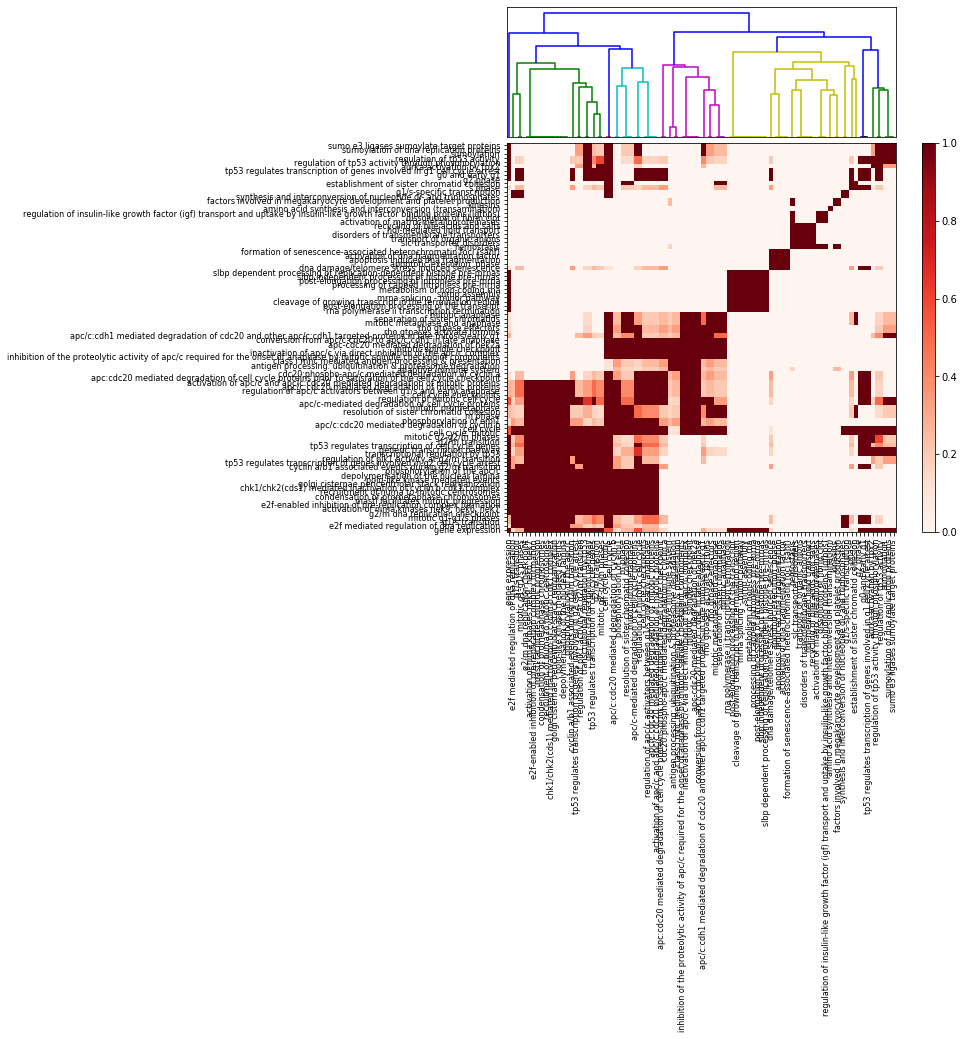

In [25]:
# We can visualize this with the dist_matrix function
df.dist_matrix(figsize=(9,9));

In [26]:
# we can apply it to remove the lesser enriched terms with the remove_redundant function
df_slim = df.remove_redundant(level='dataframe')

Number of rows went from 92 to 8


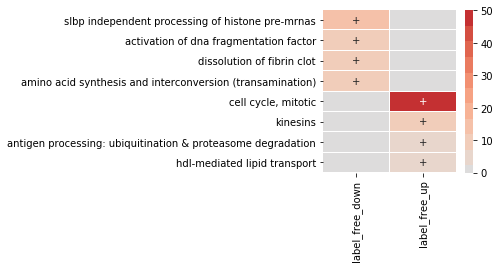

In [27]:
df_slim.heatmap(
    min_sig=1, 
    linewidths=0.01, 
    convert_to_log=False,
    figsize=(3, 3)
);

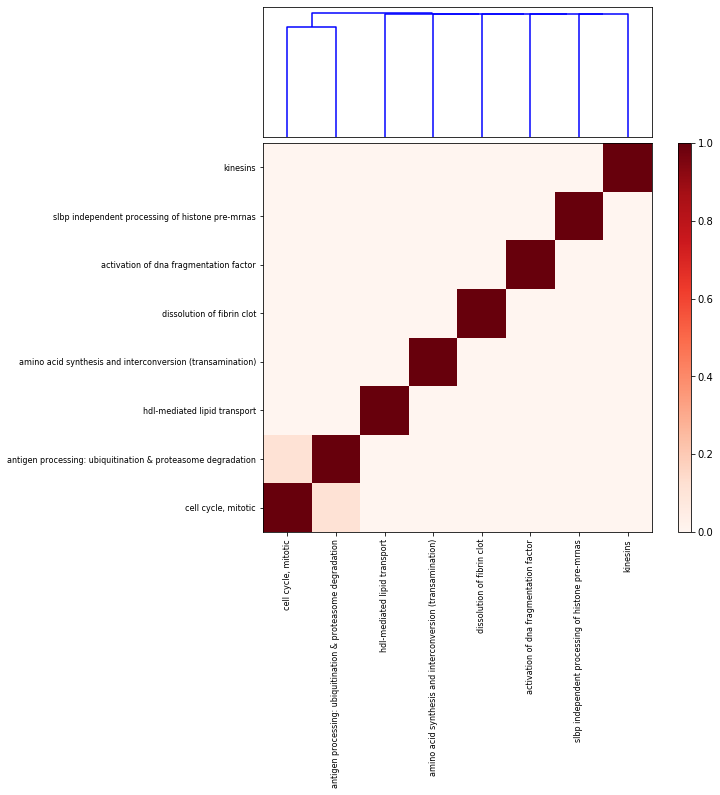

In [28]:
df_slim.dist_matrix(figsize=(9,9));

We can still recover the terms removed based on the highest level term kept.

Number of rows went from 92 to 8


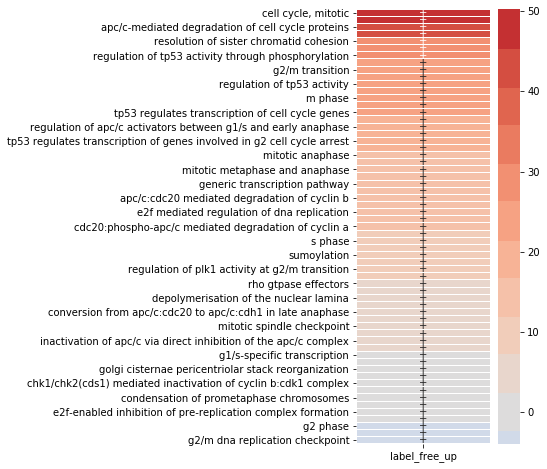

In [29]:
df.show_terms_below('cell cycle, mitotic').heatmap(
    linewidths=0.01, 
    convert_to_log=False,
    figsize=(3, 8));

Number of rows went from 92 to 8


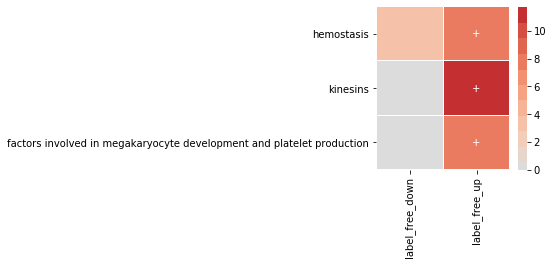

In [30]:
df.show_terms_below('kinesins').heatmap(
    linewidths=0.01, 
    convert_to_log=False,
    figsize=(3, 3));

We can use these enriched terms and create a heatmap of those terms.

In [ ]:
exp_data.label_free.heatmap(
    df_slim.term_to_genes('cell cycle, mitotic'),
    subset_index='identifier',
    index='label',
    linewidths=0.01, 
    cluster_row=True, 
    min_sig=4,
    figsize=(4, 8)
);

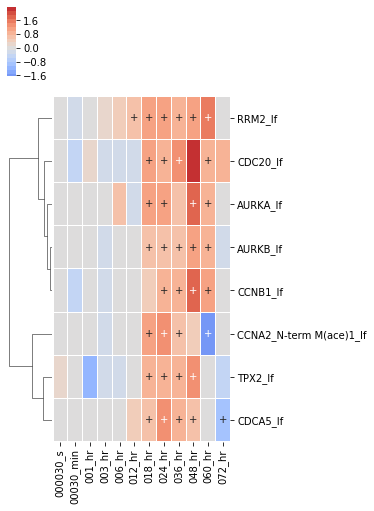

In [32]:
from magine.utils
genes_in_labels = utils.create_dict_from_node_attributes(mol_net, 'termName')
heatmap_by_terms(
    exp_data.rna,
    convert_to_log=True,
    index='label',
    term_labels=list(genes_in_labels.keys()),
    term_sets=list(genes_in_labels.values()),
    div_colors=True, 
    linewidths=0.01,
    min_sig=1,
    annotate_sig=True, 
    cluster_col=False,
    cluster_row=False,
    y_tick_labels=True,
    figsize=(8, 8)
);

## Enrichment analysis


##### We can use the ExperimentalData class to filter the data to create lists of genes for further analysis. We take these lists and run enrichment analysis using Enrichr. 

<img src="magine_enrichment.png" alt="Drawing" style="width: 800px;"/>


Since this part is time consuming, it is best to do it outside of a notebook. The code to do so can be found in "run_enrichment.py". The results will be a csv file that we will load next.

In [ ]:
enrichment_array = load_enrichment_csv('Data/bendamustine_enrichment.csv.gz', index_col=0)

In [ ]:
drug_dbs = [
    'DrugMatrix', 
    'Drug_Perturbations_from_GEO_2014', 
#     'LINCS_L1000_Chem_Pert_down',
#     'LINCS_L1000_Chem_Pert_up'
]
drug = enrichment_array.filter_multi(
    p_value=0.05,
#     combined_score=0.0, 
    db=drug_dbs,
#     rank=100,
    category=['ph_silac_down', 'ph_silac_up',],
)
drug.sort_values('rank', inplace=True, ascending=True)
# drug.term_name = drug.term_name.str.split('_').str.get(0)
drug.head(10)
drug = clean_drug_dbs(drug)

In [ ]:
word_cloud = create_wordcloud(drug)
word_cloud.plot();